Plotting


Base path /home/pooja/Desktop/Research/Cluster/Data_Files_For_Plotting//Data_03062025/ exists.
Go ahead and start plotting :) :) 


N_list: [128, 256]
alpha_list: [0.001]
mnoise_list: [1.0]

File name,  filename:                                      data_tau_diffEetaalpha2_NoisePL_N128_g2mu1_alpha0.001_m1.0_Nevents1000.csv
File name with its full path,  filename_with_path:         /home/pooja/Desktop/Research/Cluster/Data_Files_For_Plotting//Data_03062025/data_tau_diffEetaalpha2_NoisePL_N128_g2mu1_alpha0.001_m1.0_Nevents1000.csv 


File name,  filename:                                      data_tau_diffEetaalpha2_NoisePL_N128_g2mu2_alpha0.001_m1.0_Nevents1000.csv
File name with its full path,  filename_with_path:         /home/pooja/Desktop/Research/Cluster/Data_Files_For_Plotting//Data_03062025/data_tau_diffEetaalpha2_NoisePL_N128_g2mu2_alpha0.001_m1.0_Nevents1000.csv 

File /home/pooja/Desktop/Research/Cluster/Data_Files_For_Plotting//Data_03062025/data_tau_diffEetaalpha2_NoisePL_N12

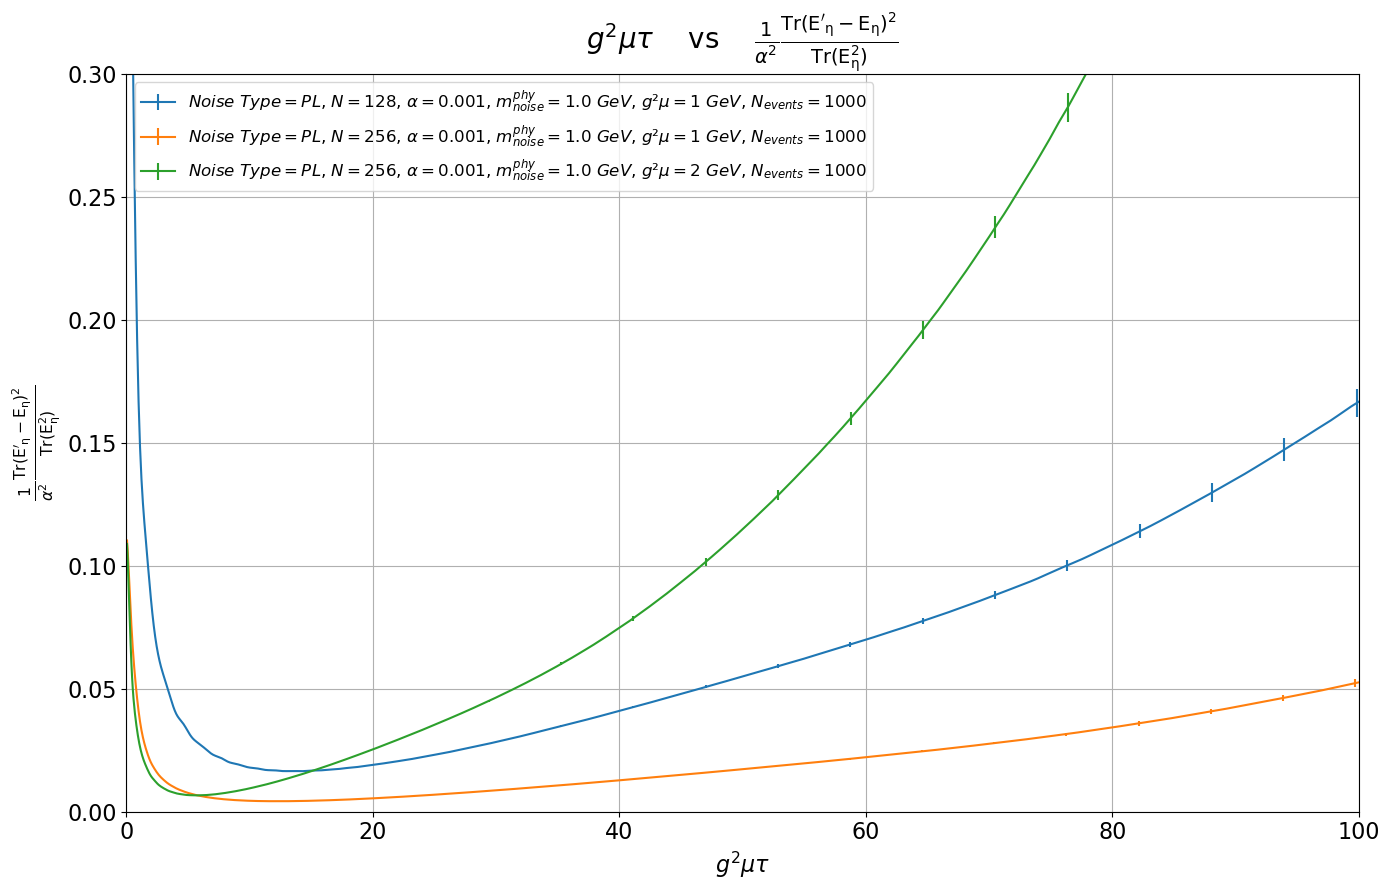

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


""""
from matplotlib import rc
# rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size':18})
"""


# +++++++++++++++++++++++++++++++++++++++++++ Initializing the base path  +++++++++++++++++++++++++++++++++++++++++++ #
#base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files_For_Plotting/Final_data/N256_N128_Nevents2000/"                                # Base directory
base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files_For_Plotting//Data_03062025/"                                # Base directory

# Check if the base path exists
if not os.path.exists(base_path):
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")
else:
    print(f"Base path {base_path} exists.\nGo ahead and start plotting :) :) \n\n")
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #




# ======================================================================================================================= #
# Parameter lists

# N_list = [32, 64, 128, 256, 512, 1024]

noise_type_list = ["PL"]
g2mu_list = [1, 2] 
N_list = [128, 256]  
alpha_list = [0.001]#, 0.0001, 0.00001]  # List of alpha values                                                                     
mnoise_list = [1.0] 
N_events = 1000



  
linestyles = ['-', '--', '-.']                                                              # List of line styles for the plot
                                                                                                                                                                
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)

noise_type_str = noise_type_list[0]                                                             # Use the first element of the list as a string
g2mu = g2mu_list[0]                                                                                 # Use the first element of the list as a string

# ======================================================================================================================= #

# Plot setup
plt.figure(figsize=(14, 9))



# Loop through all combinations
for N in N_list:
    for alpha in alpha_list:
        for g2mu in g2mu_list:
            for mnoise_index, mnoise in enumerate(mnoise_list):


                # Format float to avoid issues like 0.1 becoming 0.10000000000001
                alpha_str = f"{alpha:.6f}".rstrip('0').rstrip('.')                                  # Cleaner display of alpha
                                                                                                    # Formats alpha as a string with 6 decimal places. 
                                                                                                    # Removes trailing zeros and (decimal if exists) from the right side of the string.
                                                                                                    # print("alpha    :",  alpha, alpha_str, f"{alpha:.5f}")
                                                                                        
                mnoise_str = f"{mnoise:.1f}" 

                


                
                filename = f"data_tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_g2mu{g2mu}_alpha{alpha_str}_m{mnoise_str}_Nevents{N_events}.csv"   # Dynamically generate file names
                filename_with_path = os.path.join(base_path, filename)
                        
                print("\nFile name,  filename:                                     ", filename)
                print("File name with its full path,  filename_with_path:        ", filename_with_path, "\n")
                    
                    # Check if the file exists
                if not os.path.exists(filename_with_path):
                    print(f"File {filename_with_path} does not exist. \nSkipping this file ...")
                    continue

                df1 = pd.read_csv(filename_with_path)
                x_data = df1["tau"]
                y_data = df1["diff_Eetaalpha2"]
                y_error = df1["diff_Eetaalpha2_error"] 

                plot_label = rf"$Noise~Type = {noise_type_str}$, $N = {N}$, $\alpha = {alpha_str}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ GeV$, $g²\mu = {g2mu}~ GeV$, $N_{{events}} = {N_events}$"


                plt.errorbar(x_data, y_data, y_error, label=plot_label, errorevery=100,)

# Set x and y limits
plt.xlim(0.0, 100)                                                                                        # To change the x scale
plt.ylim(0.0, 0.3)                                                                                        # To change the y scale

# Set x and y ticks     
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Final plot formatting
plt.xlabel(r"$g^2 \mu \tau$", fontsize=16)
plt.ylabel(r"$  \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=16)
plt.title(r"$g^2 \mu \tau$    vs    $ \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=20)            # Plot title


plt.legend(fontsize=12, loc='best', ncol=1)  # Adjust layout if crowded
plt.grid(True)
plt.tight_layout()
plt.show()
